### Pulse Shaping Amplifier $(CR-(RC)^n)$

#### Low pass filter (Frequency Response)
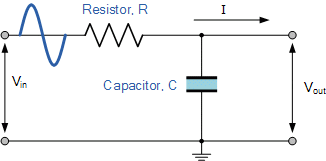
Let's consider low pass filter with passive component like RC circuit which don't amplify the signal. In low pass filter, output is taken across capacitor.
Output voltage is given by:-
$$V_o=\frac{X_C}{Z}V_{in}=\frac{X_C}{\sqrt{R^2+X_C^2}}V_{in}$$
where $X_C$ is Capacitive reactance and R is resistance
$$X_C=\frac{1}{\omega C}=\frac{1}{2\pi f C}$$
where $f$ is frequency and $C$ is Capacitance

#### High pass filter (Frequency Response)
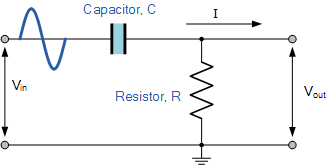
Let's consider high pass filter with passive component like RC circuit which don't amplify the signal. In high pass filter, output is taken across resistor.
Output voltage is given by:-
$$V_o=\frac{R}{Z}V_{in}=\frac{R}{\sqrt{R^2+X_C^2}}V_{in}$$
where $X_C$ is Capacitive reactance and R is resistance
$$X_C=\frac{1}{\omega C}=\frac{1}{2\pi f C}$$
where $f$ is frequency and $C$ is Capacitance

In [5]:
# Importing libraries
import numpy as np # for mathematical functions and arrays
import matplotlib.pyplot as plt # for plotting

In [6]:
# Input function
# Defining function for pre-amplifier signal for HPGe
def pre_amplifier_output_HPGe(t,tau,theta):
    # t is time array, tau is decay time and theta is rise time
    V=-(np.exp(-t/tau)-np.exp(-t/theta))/(tau-theta) # analytical formula of pre-amplifier signal for HPGe detector
    return V

In [11]:
# Choosing resistance and capacitance
R=10**3 # kilo ohms
C=10**(-6) # micro farads
# Let's plot output voltage vs time for different frequencies
f11=1
f12=50
f13=100
f21=250
f22=500
f23=10000
# t is time array, 1st and 2nd parameter is the interval divided in number of steps(equally spaced) given as 3rd parameter 
t=np.linspace(0,50,100) 
# Let's take voltage signal from HPGe Detector
tau=4
theta=8
V_pre_amplified_HPGe=pre_amplifier_output_HPGe(t,tau,theta)

In [12]:
#Let's define function for low pass filter
def low_pass_filter_f(Vi,f,R,C): # Vi is input voltage, f is frequency, R is resistance and C is capacitance
    Xc=1/(2*np.pi*f*C)
    Vo=Xc*Vi/(np.sqrt(R**2+Xc**2)) # Output voltage for low pass filter
    return Vo

#Let's define function for high pass filter
def high_pass_filter_f(Vi,f,R,C): # Vi is input voltage, f is frequency, R is resistance and C is capacitance
    Xc=1/(2*np.pi*f*C)
    Vo=R*Vi/(np.sqrt(R**2+Xc**2)) # Output voltage for high pass filter
    return Vo

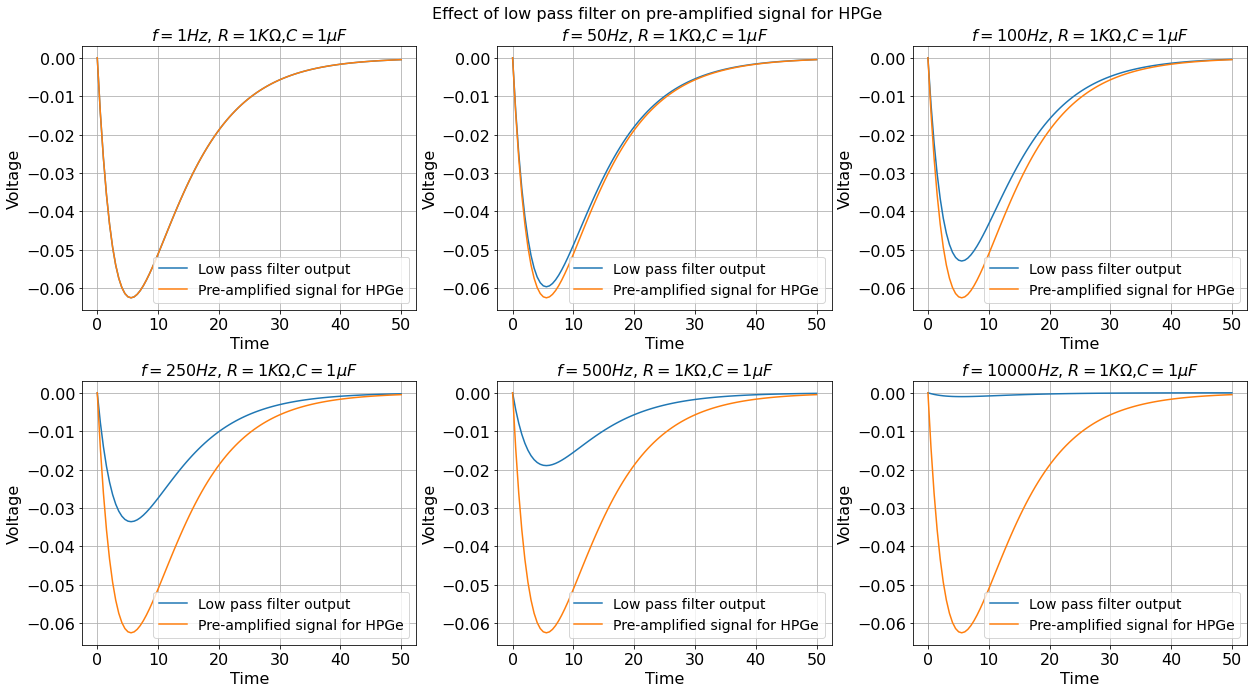

In [13]:
# For Low pass filter
# Let's plot output voltage vs time for different frequencies and display them as subplots to oberve the variation easily
fig, ax = plt.subplots(2, 3) #to subplot in 2 rows and 3 columns, all subplots are sharing x and y axis
fig.set_size_inches(18,10) # size of figure
fig.tight_layout(pad=5) # spacing between subplots
# individual commands for subplotting with different frequency parameters
# Calling low_pass_filter_f function
ax[0][0].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,f11,R,C),label='Low pass filter output')
ax[0][1].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,f12,R,C),label='Low pass filter output')
ax[0][2].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,f13,R,C),label='Low pass filter output')
ax[1][0].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,f21,R,C),label='Low pass filter output')
ax[1][1].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,f22,R,C),label='Low pass filter output')
ax[1][2].plot(t,low_pass_filter_f(V_pre_amplified_HPGe,f23,R,C),label='Low pass filter output')

# adding super title and individual titles for subplots
fig.suptitle("Effect of low pass filter on pre-amplified signal for HPGe",fontsize=16)
ax[0, 0].set_title(r'$f=1 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[0, 1].set_title(r'$f=50 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[0, 2].set_title(r'$f=100 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[1, 0].set_title(r'$f=250 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[1, 1].set_title(r'$f=500 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[1, 2].set_title(r'$f=10000 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)

# Loop to add gridlines and label axes in all subplots
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].xaxis.set_tick_params(labelsize=16)
        ax[i][j].yaxis.set_tick_params(labelsize=16)
        ax[i][j].plot(t,V_pre_amplified_HPGe,label='Pre-amplified signal for HPGe')
        ax[i][j].set_xlabel("Time",fontsize=16)
        ax[i][j].set_ylabel("Voltage",fontsize=16)
        ax[i][j].legend(loc='lower right',fontsize=14)
        ax[i][j].grid()
plt.show()

#### In above plots, it is clear that low pass filter is allowing only low frequencies to pass and as frequency increases the output voltage decreases.

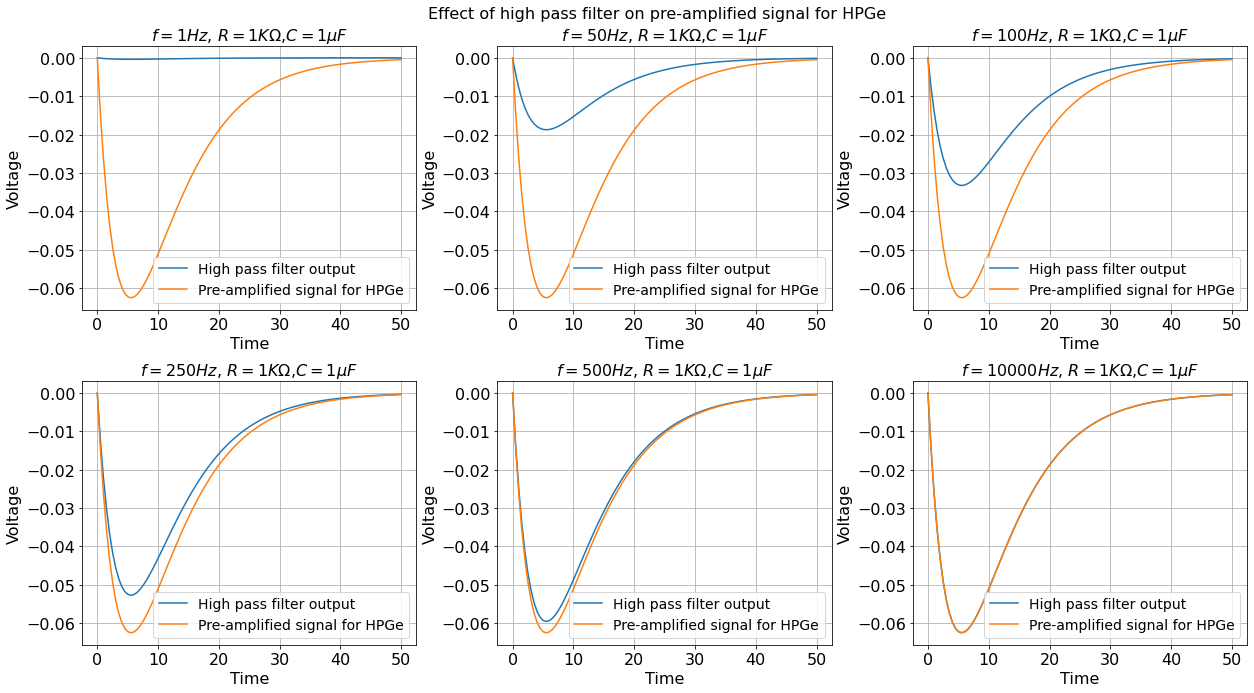

In [14]:
# For High pass filter
# Let's plot output voltage vs time for different frequencies and display them as subplots to oberve the variation easily
fig, ax = plt.subplots(2, 3) #to subplot in 2 rows and 3 columns, all subplots are sharing x and y axis
fig.set_size_inches(18,10) # size of figure
fig.tight_layout(pad=5) # spacing between subplots

# individual commands for subplotting with different frequency parameters
# Calling high_pass_filter_f function
ax[0][0].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,f11,R,C),label='High pass filter output')
ax[0][1].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,f12,R,C),label='High pass filter output')
ax[0][2].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,f13,R,C),label='High pass filter output')
ax[1][0].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,f21,R,C),label='High pass filter output')
ax[1][1].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,f22,R,C),label='High pass filter output')
ax[1][2].plot(t,high_pass_filter_f(V_pre_amplified_HPGe,f23,R,C),label='High pass filter output')

# adding super title and individual titles for subplots
fig.suptitle("Effect of high pass filter on pre-amplified signal for HPGe",fontsize=16)
ax[0, 0].set_title(r'$f=1 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[0, 1].set_title(r'$f=50 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[0, 2].set_title(r'$f=100 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[1, 0].set_title(r'$f=250 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[1, 1].set_title(r'$f=500 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)
ax[1, 2].set_title(r'$f=10000 Hz$, $R=1 K\Omega$,$C=1\mu F$',fontsize=16)

# Loop to add gridlines and label axes in all subplots
for i in range(0,2):
    for j in range(0,3):
        ax[i][j].xaxis.set_tick_params(labelsize=16)
        ax[i][j].yaxis.set_tick_params(labelsize=16)
        ax[i][j].plot(t,V_pre_amplified_HPGe,label='Pre-amplified signal for HPGe')
        ax[i][j].set_xlabel("Time",fontsize=16)
        ax[i][j].set_ylabel("Voltage",fontsize=16)
        ax[i][j].legend(fontsize=14)
        ax[i][j].grid()
plt.show()

#### In above plots, it is clear that high pass filter is allowing only high frequencies to pass and as frequency increases the output voltage also increases.

### Time Domain

#### Low Pass Filter (Time Domain)

$$\boxed{V_{out}(t'=t)=\frac{e^{-t/\tau}}{\tau}\int_{t'=0}^{t'=t}V_{in}(t')e^{t'/\tau}dt'}$$
where $\tau=RC$ is decay time 
##### For step pulse, $V_{in}$ will be constant and the expression will be reduced to:-
$$\boxed{V_{out}=V_{in}(1-e^{-t/\tau})}$$

#### High Pass Filter (Time Domain)

$$\boxed{V_{out}(t'=t)=\left(e^{-t/\tau}\int_{t'=0}^{t'=t}\frac{dV_{in}(t')}{dt'}e^{t'/\tau}dt'\right)+V_{in}(t'=0)e^{-t/\tau}}$$
where $\tau=RC$ is decay time
##### For step pulse, $V_{in}$ will be constant and the expression will be reduced to:-
$$\boxed{V_{out}=V_{in}e^{-t/\tau}}$$

We can calculate the output of low and high pass filters for any general input pulse by using numerical integration and differentiation. 
### Numerical Integration
For numerical integration, there are different methods. I will be using Composite simpson 1/3 method for the same.

#### Simpson 1/3 Rule
In Simpson 1/3rd method, we approximate the function to be integrated as 2nd order polynomial (parabola) using Newton's divided difference polynomial
$$f_2(x)=b_0+b_1(x-a)+b_2(x-a)\left(x-\left(\frac{a+b}{2}\right)\right)$$
where
$$b_0=f(a)$$

$$b_1=\frac{f\left(\frac{a+b}{2}\right)-f(a)}{\left(\frac{a+b}{2}\right)-a}$$

$$b_2=\frac{\left[\dfrac{f(b)-f\left(\dfrac{a+b}{2}\right)}{b-\left(\dfrac{a+b}{2}\right)}\right]-\left[\dfrac{f\left(\dfrac{a+b}{2}\right)-f(a)}{\left(\dfrac{a+b}{2}\right)-a}\right]}{b-a}$$

$$\begin{align}
\int_a^b f(x)dx &\approx\int_a^b f_2(x)dx\\
&=\int_a^b \left(b_0+b_1(x-a)+b_2(x-a)\left(x-\left(\frac{a+b}{2}\right)\right)\right)dx \\
&=\left[b_0x+b_1\left(\frac{x^2}{2}-ax\right)+b_2\left(\frac{x^3}{3}-\frac{(3a+b)x^2}{4}+\frac{a(a+b)x}{2}\right)\right]_a^b \\
&=b_0(b-a)+b_1\left(\frac{b^2-a^2}{2}-a(b-a)\right)+b_2\left(\frac{b^3-a^3}{3}-\frac{(3a+b)(b^2-a^2)}{4}+\frac{a(a+b)(b-a)}{2}\right)
\end{align}$$

Substituting values of $b_0$, $b_1$ and $b_2$, we will get
$$\begin{align}\int_a^b f(x)dx &\approx \frac{(b-a)}{6}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right] \\
&=\frac{h}{3}\left[f(a)+4f\left(\frac{a+b}{2}\right)+f(b)\right]\end{align}$$

#### Composite simpson 1/3 Rule
$$\begin{align}I&=\int_{x_0}^{x_n}f_n(x)dx\\
&=\int_{x_0}^{x_2}f_n(x)dx+\int_{x_2}^{x_4}f_n(x)dx+......+\int_{x_{n-2}}^{x_n}f_n(x)dx\\
&=\frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)]+\frac{h}{3}[f(x_2)+4f(x_3)+f(x_4)]+......\frac{h}{3}[f(x_{n-2})+4f(x_{n-1})+f(x_n)]\\
&=\frac{h}{3}\left[f(x_0)+4\sum_{i=1\\ i,odd}^{n-1}f(x_i)+2\sum_{j=2\\ j,even}^{n-2}f(x_j)+f(x_n)\right]\end{align}$$

### Numerical Differentiation
I will be using Central Difference Scheme along with forward and backward difference scheme for boundary points.

Using Taylor Series
$$f(t+\Delta t)=f(t)+\Delta t \frac{\delta f}{\delta t}+\frac{\Delta t^2}{2!} \frac{\delta^2 f}{\delta t^2}+....$$
$$f(t-\Delta t)=f(t)-\Delta t \frac{\delta f}{\delta t}+\frac{\Delta t^2}{2!} \frac{\delta^2 f}{\delta t^2}+....$$
Neglecting higher order terms
$$f(t+\Delta t)=f(t)+\Delta t \frac{\delta f}{\delta t}$$
$$f(t-\Delta t)=f(t)-\Delta t \frac{\delta f}{\delta t}$$
Subtracting these equations, we will get 
#### Central Difference Formula
$$\frac{df}{dt}=\frac{f(t+\Delta t)-f(t-\Delta t)}{2\Delta t}$$
#### Forward Difference Formula
$$\frac{df}{dt}=\frac{f(t+\Delta t)-f(t)}{\Delta t}$$
#### Backward Difference Formula
$$\frac{df}{dt}=\frac{f(t)-f(t-\Delta t)}{\Delta t}$$

In [20]:
# Initiate varaibles
tau=10 # decay time
n_i=10 # number of steps in which time interval is divided for integration
n_o=20 # (number of elements in output array)-1
N=1+n_o*n_i # number of steps in which main time array is divided

In [21]:
# For input step/constant pulse
def Vi(t_): # t_ is time array at which input voltage needs to be calculated
    V_amp=1 # Amplitude
    v=[]
    for i in range(len(t_)):
        v.append(V_amp)
    v=np.array(v) # Voltage array correspoding to t_ array
    return v

In [22]:
# Defining integration function
def integrate(integrand_values,ti):
    #integrand_values is array of values of integrand at the points in which interval is divided
    # ti is the time arrays over which integration will be done, ti is t' mentioned in formula for output voltage
    a=ti[0] # lower limit of integration
    b=ti[-1] # upper limit of integration
    n=len(ti)-1 # number of steps in which interval (a,b) is divided
    sum_even=0 # initializing the summations
    sum_odd=0
    # Below loop will calculate the odd and even summations mentioned in Simpson 1/3 rule
    for i in range(1,n):
        if i%2==0:
            sum_even+=integrand_values[i]
        else:
            sum_odd+=integrand_values[i]
            
    if a==b:
        I=0 # If lower and upper limit are equal, integration will be 0
    else:
        I=(b-a)*(integrand_values[0]+4*sum_odd+2*sum_even+integrand_values[-1])/(3*n) #Composite Simpson 1/3 rule
    return I

In [23]:
# Defining differentiation function
# Let's keep the interval, step size and number of points in which interval is divided same for integration and differentiation
def differentiate(differentiable_arr,ti):
    # ti is time array which is divided into equal steps for integration/differentiation
    # differentiable_arr is the array that needs to be differentiated
    dif=[] # creating the empty list to store values after differentiation
    
    # upper limit of integration is variable, so when ti will contain only 1 element, we can declare differentiation output as 0
    # Any how if lower and upper limit of integration will be same, integration output will be 0
    if len(ti)==1:
        dif.append(0)
        dif=dif*len(ti)
    else:
        for i in range(len(ti)):
            h=ti[1]-ti[0] # step size
            if i==0:
                dif.append((differentiable_arr[i+1]-differentiable_arr[i])/h) # Forward Difference Rule
            elif ((i!=0) and (i!=len(ti)-1)):
                #print(i)
                dif.append((differentiable_arr[i+1]-differentiable_arr[i-1])/(2*h)) # Central Difference Rule
            else:
                dif.append((differentiable_arr[i]-differentiable_arr[i-1])/h) # Backward Difference Rule
    dif=np.array(dif) # converting list into array
    return dif

In [24]:
#Below function will give the low pass filter output voltage array
def low_pass_filter(V_at_T,T): # T is time array, V_at_T is input voltage array at these time T
    flag=0
    t1=T[0:len(T):n_i] # time array at which output voltage will be calculated
    # Note upper limit of integration is variable
    # This time array t1 is collection of all upper limits
    # n_i are number of steps in which time interval is divided for integration
    integrated_arr=[]
    for i in range(len(t1)):
        ti=T[0:flag+i+1] #We are taking time values from 0 to the upper limit of integration which is variable
        V_at_ti=V_at_T[0:flag+i+1] # Input voltage array corresponding to ti
        flag+=n_i-1 # flag helps in proper indexing to jump (n_i-1) steps with each cycle
        integrand_values=V_at_ti*np.exp(ti/tau) # integrand values at points in which interval is divided
        integrated_arr.append(integrate(integrand_values,ti)) # calling integrate function
    integrated_arr=np.array(integrated_arr) 
    Vo=np.exp(-t1/tau)*integrated_arr/tau #  low pass filter output formula
    return Vo

In [25]:
#Below function will give the high pass filter output voltage array
def high_pass_filter(V_at_T,T): # T is time array, V_at_T is input voltage array at these time T
    flag=0
    t1=T[0:len(T):n_i] # time array at which output voltage will be calculated
    # Note upper limit of integration is variable
    # This time array t1 is collection of all upper limits
    # n_i are number of steps in which time interval is divided for integration
    integrated_arr=[]
    for i in range(len(t1)):
        ti=T[0:flag+i+1] #We are taking time values from 0 to the upper limit of integration which is variable
        V_at_ti=V_at_T[0:flag+i+1] # Input voltage array corresponding to ti
        flag+=n_i-1 # flag helps in proper indexing to jump (n_i-1) steps with each cycle
        differentiated_arr=differentiate(V_at_ti,ti) # calling differentiate function
        integrand_values=differentiated_arr*np.exp(ti/tau) # integrand values at points in which interval is divided
        integrated_arr.append(integrate(integrand_values,ti)) # calling integrate function
    integrated_arr=np.array(integrated_arr) 
    Vo=np.exp(-t1/tau)*(integrated_arr+V_at_ti[0]) #  high pass filter output formula
    return Vo

In [26]:
# Time and input voltage arrays
T=np.linspace(0,50,N) # main time array
t1=T[0:len(T):n_i] # time array at which output voltage will be calculated
V_at_T=Vi(T) # Input voltage corresponding to T array
V_at_t1=Vi(t1) # Input voltage corresponding to t1 array

# Low pass filter
Vo_lowpass=low_pass_filter(V_at_T,T) # calling low_pass_filter function
Vi_amp=1 # Amplitude of step pulse
Vo_low_step=Vi_amp*(1-np.exp(-t1/tau)) # analytical formula for low pass filter output having constant input pulse
# We will cross check our result for constant/step input pulse using the analytical formula

# High pass filter
Vo_highpass=high_pass_filter(V_at_T,T) # calling high_pass_filter function
Vo_high_step=Vi_amp*(np.exp(-t1/tau)) # analytical formula for high pass filter output having constant input pulse
# We will cross check our result for constant/step input pulse

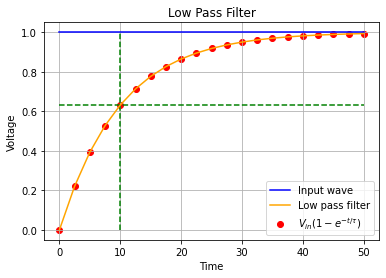

In [27]:
# Plotting low pass filter output
# We know that at t=tau, output for low pass filter for constant input pulse becomes 63%
# Let's verify this by drawing the horizontal and vertical lines for visualization across these points

# For vertical line corresponding to t=tau
y1=np.linspace(0,Vi_amp,10)
x1=[]
for i in range(len(y1)):
    x1.append(tau)
x1=np.array(x1)
# For horizontal line corresponding to V=0.63*V_max
x2=t1 # time array at which output voltage is calculated
y2=[]
for i in range(len(x2)):
    y2.append(Vi_amp*0.63)
y2=np.array(y2)

# Plotting and labelling
plt.plot(x1,y1,linestyle='dashed',color='green') # plotting required vertical line
plt.plot(x2,y2,linestyle='dashed',color='green') # plotting required horizontal line
plt.plot(t1,V_at_t1,label='Input wave',color='blue') # plotting time vs input voltage signal
plt.plot(t1,Vo_lowpass,label='Low pass filter',color='orange') # plotting time vs low pass filter output voltage
plt.scatter(t1,Vo_low_step,label=r'$V_{in}(1-e^{-t/\tau})$',color='red') # plotting time vs analytical formula for constant input pulse to cross check our result
plt.legend() # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title("Low Pass Filter")
plt.grid() # to add gridlines
plt.show()

• The above plot is for the step pulse taken as the input.

• Analytical low pass output function for step pulse is exactly coinciding with the calculated output

• We can clearly observe that when time reaches the decay time, the output voltage becomes 63% for the step pulse.

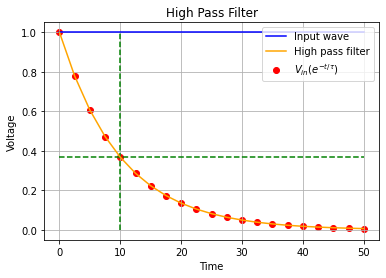

In [28]:
# Plotting high pass filter output
# We know that at t=tau, output for high pass filter for constant input pulse becomes 37%
# Let's verify this by drawing the horizontal and vertical lines for visualization across these points

# For vertical line corresponding to t=tau
y1=np.linspace(0,1,10)
x1=[]
for i in range(len(y1)):
    x1.append(tau)
x1=np.array(x1)
# For horizontal line corresponding to V=0.37*V_max
x2=t1 # time array at which output voltage is calculated
y2=[]
for i in range(len(x2)):
    y2.append(Vi_amp*0.37)
y2=np.array(y2)

# Plotting and labelling
plt.plot(x1,y1,linestyle='dashed',color='green') # plotting required vertical line
plt.plot(x2,y2,linestyle='dashed',color='green') # plotting required horizontal line
plt.plot(t1,V_at_t1,label='Input wave',color='blue') # plotting time vs input voltage signal
plt.plot(t1,Vo_highpass,label='High pass filter',color='orange') # plotting time vs high pass filter output voltage
plt.scatter(t1,Vo_high_step,label=r'$V_{in}(e^{-t/\tau})$',color='red') # plotting time vs analytical formula for constant input pulse to cross check our result
plt.legend(loc='upper right') # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title("High Pass Filter")
plt.grid() # to add gridlines
plt.show()

• The above plot is for the step pulse taken as the input.

• Analytical high pass output function for step pulse is exactly coinciding with the calculated output

• We can clearly observe that when time reaches the decay time (t=10 in this case), the output voltage becomes 37% for the step pulse.

## $CR-(RC)^n$ Bandpass filter
In order to design the $CR − (RC)^n$ filter, the input signal is fed to CR filter and its output is fed to RC filter. This output is fed to another RC filter and the process repeats n times.

In [30]:
# Initialising the variables
n_o=30 # (number of elements in output array)-1
n_i=2 # Number of minimum steps of integration/differentiation

In [31]:
# Defining a function for CR-(RC)^n pulse shaping
# In order to design the CR − (RC)n filter, the input signal is fed to CR filter and its output is fed to RC filter. 
# This output is fed to another RC filter and the process repeats n times.
def CR_RC_n(n): # n is number of RC circuits (low pass filter) followed by CR network (high pass filter)
    V_at_T=Vi(T) # Calling input voltage function
    #print('T',len(T))
    V_at_t=high_pass_filter(V_at_T,T) # output of CR
    t=T
    for i in range(n):
        t=t[0:len(t):n_i] # time array at which output voltage will be calculated after each RC network
        V_at_t=low_pass_filter(V_at_t,t) # calling low pass filter n times
    return V_at_t # Output of CR-(RC)^n

In [32]:
# Let's plot output corresponding to different powers of CR-(RC)^n filter
CR_RC_n_arr=[] # creating empty arrays
t_arr=[]
# For n=1 and n=even values
for i in range(0,8,2): # n=even
    if i==0:
        n=1
    else:
        n=i
    n1=n+1 # Number of times main time array T will be divided
    N=1+n_o*(n_i)**n1 # (Number of elements in main time array T)-1
    T=np.linspace(0,150,N) # Main time array
    CR_RC_n_arr.append(CR_RC_n(n)) # calling CR_RC_n function
    t=T
    for j in range(n1):
        t=t[0:len(t):n_i] # time array at which output voltages are calculated after each RC network
    t_arr.append(t) # storing time array at which output voltages are calculated after each CR-(RC)^n network

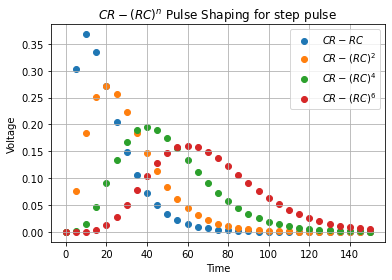

In [33]:
# Plotting and labelling
plt.scatter(t_arr[0],CR_RC_n_arr[0],label=r'$CR-RC$') # CR-(RC)^1
plt.scatter(t_arr[1],CR_RC_n_arr[1],label=r'$CR-(RC)^2$') # CR-(RC)^2
plt.scatter(t_arr[2],CR_RC_n_arr[2],label=r'$CR-(RC)^4$') # CR-(RC)^4
plt.scatter(t_arr[3],CR_RC_n_arr[3],label=r'$CR-(RC)^6$') # CR-(RC)^6
plt.legend(loc='upper right') # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title(r'$CR-(RC)^n$ Pulse Shaping for step pulse')
plt.grid() # to add gridlines
plt.show()

#### From above plots, we can conclude that as power of n increases in $CR − (RC)^n$, the output pulse is coming closer to Gaussian shape.

In [34]:
# Let's apply this bandpass filter for pre-amplifier signal for HPGe
n_o=40 # (number of elements in output array)-1
n_i=5 # Number of minimum steps of integration/differentiation

In [35]:
# Defining function for pre-amplifier signal for HPGe
def Vi(t_): # t_ is time array
    tau=2 # decay time
    theta=1 # rise time
    V=(np.exp(-t_/tau)-np.exp(-t_/theta))/(tau-theta)
    return V

In [36]:
# Let's apply CR-(RC)^n pulse shaping to the pre-amplifier signal for HPGe detector
CR_RC_n_arr=[] # creating empty arrays
t_arr=[]
# For n=1 and n=even values
for i in range(0,4,2): # n=even
    if i==0:
        n=1
    else:
        n=i
    n1=n+1 # Number of times main time array T will be divided
    N=1+n_o*(n_i)**n1 # (Number of elements in main time array T)-1
    T=np.linspace(0,60,N) # Main time array
    CR_RC_n_arr.append(CR_RC_n(n)) # calling CR_RC_n function
    t=T
    for j in range(n1):
        t=t[0:len(t):n_i] # time array at which output voltages are calculated after each RC network
    t_arr.append(t) # storing time array at which output voltages are calculated after each CR-(RC)^n network

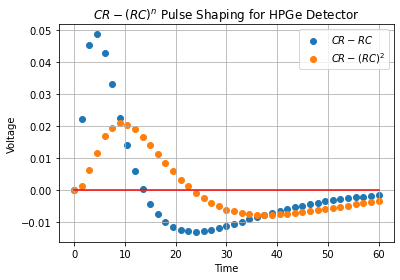

In [37]:
# add x axis at y=0
x=t_arr[0]
y=np.array([0]*len(x))
# Plotting and labelling
plt.scatter(t_arr[0],CR_RC_n_arr[0],label=r'$CR-RC$')
plt.scatter(t_arr[1],CR_RC_n_arr[1],label=r'$CR-(RC)^2$')
plt.plot(x,y,color='red')
plt.legend(loc='upper right') # command to display labels
plt.xlabel("Time") # Labelling the axes
plt.ylabel("Voltage")
plt.title(r'$CR-(RC)^n$ Pulse Shaping for HPGe Detector')
plt.grid() # to add gridlines
plt.show()

#### Undershoot is clearly observed in the above plot for signal from HPGe detector. Pole-zero correction is used to bring the undershoot back to the baseline.